# Part A : SIGNAL STRENGTH CLASSIFIER

### DOMAIN: 
Electronics and Telecommunication
### CONTEXT: 
A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.
### DATA DESCRIPTION: 
The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

### PROJECT OBJECTIVE: 
To build a classifier which can use the given parameters to determine the signal strength or quality.


#### 1. Import data.

In [211]:
# Importing required libraries
import numpy as np       
import pandas as pd      

# read csv file with ";" as seprators
DB=pd.read_csv("Signal.csv",sep=",")  

# Display top 5 rows of the dataset
DB.head() 

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [212]:
# Shape and size of data

print("Shape:",DB.shape)
print("\nColumns:",DB.shape[0])
print("\nRows:",DB.shape[1])
print("\nSize:",DB.size)

Shape: (1599, 12)

Columns: 1599

Rows: 12

Size: 19188


* There are 1599 rows and 12 columns were present in given data set

In [213]:
# Null value detection in percentage

DB.isna().sum()*100/len(DB)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

NO null values present in data set. So no need of preprocessing

In [214]:
DB.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [215]:
DB.duplicated().sum()

240

* About 240 values were duplicated in data set. So, remove those duplicates by keeping the first occurence

In [216]:
#dropping duplicate values keeping first occurence
DB.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [217]:
DB.duplicated().sum()


0

* All duplicates were removed

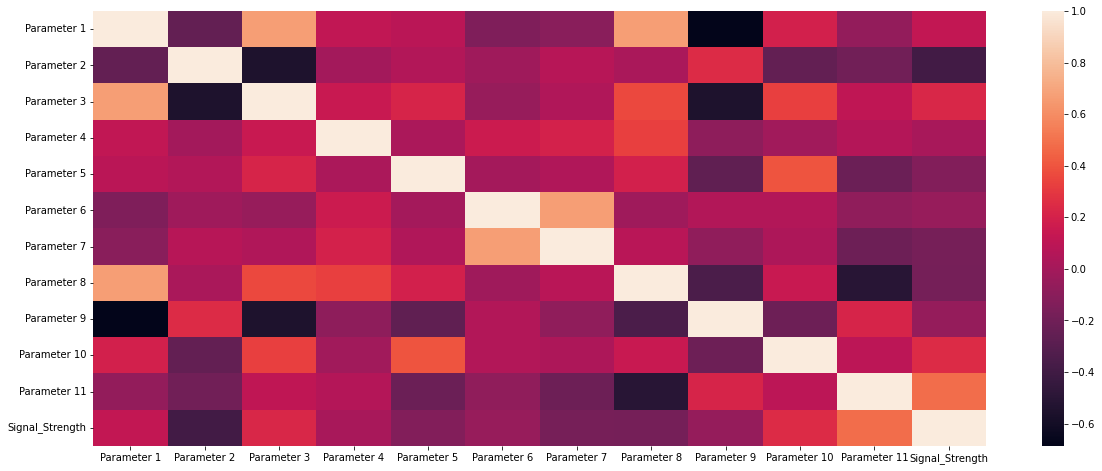

In [218]:
CORRELATION=DB.corr()
CORRELATION
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,8))
sns.heatmap(CORRELATION)
plt.show()

* Parameter (2 & 3), (1 & 9),(3 & 9),(8 & 11) are less correlated
* parameter (1 & 3), (1 & 8), (6 & 7) are more correlated


#### 2. Data analysis & visualisation

In [219]:
count=DB['Signal_Strength'].value_counts(ascending=True)
print(count)


3     10
8     17
4     53
7    167
6    535
5    577
Name: Signal_Strength, dtype: int64


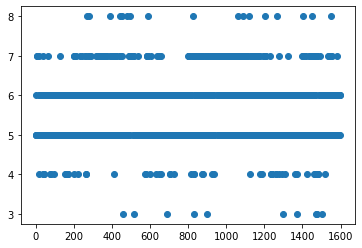

In [220]:
plt.scatter(DB.index,DB['Signal_Strength'])
plt.show()



### Insights from target distribution
* On an average, most of the product has good quality signals ranging from '5' to '8'
* Out of 1599 parameter, Only 63 parameters i.e around 4% parametes were given poor quality ranging between '3' & '4'
* Parameter '7' has greater variantion in signal qulaity performance
* Aboubt 2/3rd of parameters were given moderate to good quality signal range

#### Data preprocessing

In [221]:
# Feature Importance

# Independent variables
X=DB.drop('Signal_Strength',axis=1) 

# Target variable
Y=DB['Signal_Strength']                   



[0.07688422 0.09843508 0.07997771 0.07880881 0.07948105 0.0749729
 0.10260633 0.08172731 0.07669588 0.10255242 0.14785829]


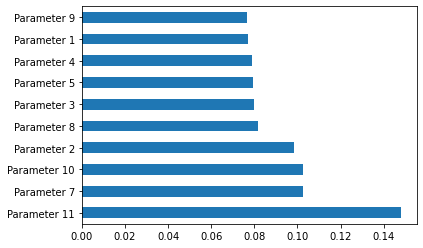

In [222]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)

#using inbuilt class "feature_importances" of tree based classifiers
print(model.feature_importances_) 

#ploting graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#Observation: Most Effective - Parameter 11

3. Designing, training, tuning and testing a neural network classifier.

In [223]:
import sklearn
from sklearn.model_selection import train_test_split

# Independent variables
X=DB.drop('Signal_Strength',axis=1)

# Target variable
Y=DB['Signal_Strength']               

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

In [224]:
#Normalising the dataset with standardscaler 
from sklearn.preprocessing import StandardScaler

# Scaling train data
X_Train_S = StandardScaler().fit_transform(X_Train) 

# Scaling test data
X_Test_S = StandardScaler().fit_transform(X_Test)  

In [225]:
# Converting y data into categorical (one-hot encoding)
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [226]:
# Confirming Matrix size
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(951, 11)
(408, 11)
(951, 9)
(408, 9)


In [227]:
from keras.models import Sequential # Forward prop
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

In [228]:
NN_model_Classifier = Sequential()

# The Input Layer :
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train_S.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_54 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 16)                528       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 9)               

In [229]:
EPOCH=400
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
5/5 [==============================] - 4s 201ms/step - loss: 0.1975 - accuracy: 0.2414 - val_loss: 0.1973 - val_accuracy: 0.4069
Epoch 2/400
5/5 [==============================] - 0s 16ms/step - loss: 0.1973 - accuracy: 0.4004 - val_loss: 0.1971 - val_accuracy: 0.4167
Epoch 3/400
5/5 [==============================] - 0s 15ms/step - loss: 0.1971 - accuracy: 0.4138 - val_loss: 0.1969 - val_accuracy: 0.3922
Epoch 4/400
5/5 [==============================] - 0s 14ms/step - loss: 0.1967 - accuracy: 0.4079 - val_loss: 0.1964 - val_accuracy: 0.3897
Epoch 5/400
5/5 [==============================] - 0s 13ms/step - loss: 0.1963 - accuracy: 0.3968 - val_loss: 0.1957 - val_accuracy: 0.3897
Epoch 6/400
5/5 [==============================] - 0s 16ms/step - loss: 0.1954 - accuracy: 0.3984 - val_loss: 0.1942 - val_accuracy: 0.3897
Epoch 7/400
5/5 [==============================] - 0s 16ms/step - loss: 0.1935 - accuracy: 0.3898 - val_loss: 0.1910 - val_accuracy: 0.3897
Epoch 8/400
5/5 [==

Epoch 59/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0915 - accuracy: 0.5945 - val_loss: 0.0901 - val_accuracy: 0.6005
Epoch 60/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0892 - accuracy: 0.6011 - val_loss: 0.0890 - val_accuracy: 0.6005
Epoch 61/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0887 - accuracy: 0.6040 - val_loss: 0.0892 - val_accuracy: 0.6029
Epoch 62/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0871 - accuracy: 0.6146 - val_loss: 0.0893 - val_accuracy: 0.6005
Epoch 63/400
5/5 [==============================] - 0s 12ms/step - loss: 0.0887 - accuracy: 0.6077 - val_loss: 0.0888 - val_accuracy: 0.6005
Epoch 64/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0895 - accuracy: 0.6023 - val_loss: 0.0894 - val_accuracy: 0.5980
Epoch 65/400
5/5 [==============================] - 0s 13ms/step - loss: 0.0865 - accuracy: 0.6147 - val_loss: 0.0886 - val_accuracy: 0.6029
Epoch 66/400


Epoch 117/400
5/5 [==============================] - 0s 13ms/step - loss: 0.0819 - accuracy: 0.6332 - val_loss: 0.0888 - val_accuracy: 0.6005
Epoch 118/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0829 - accuracy: 0.6285 - val_loss: 0.0885 - val_accuracy: 0.6005
Epoch 119/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0818 - accuracy: 0.6342 - val_loss: 0.0887 - val_accuracy: 0.6005
Epoch 120/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0790 - accuracy: 0.6461 - val_loss: 0.0887 - val_accuracy: 0.6029
Epoch 121/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0793 - accuracy: 0.6451 - val_loss: 0.0884 - val_accuracy: 0.6005
Epoch 122/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0789 - accuracy: 0.6465 - val_loss: 0.0889 - val_accuracy: 0.6029
Epoch 123/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0837 - accuracy: 0.6252 - val_loss: 0.0888 - val_accuracy: 0.6005
Epoch 

Epoch 175/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0750 - accuracy: 0.6632 - val_loss: 0.0891 - val_accuracy: 0.5980
Epoch 176/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0796 - accuracy: 0.6423 - val_loss: 0.0894 - val_accuracy: 0.5980
Epoch 177/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0800 - accuracy: 0.6403 - val_loss: 0.0892 - val_accuracy: 0.6005
Epoch 178/400
5/5 [==============================] - 0s 12ms/step - loss: 0.0836 - accuracy: 0.6243 - val_loss: 0.0890 - val_accuracy: 0.6005
Epoch 179/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0820 - accuracy: 0.6316 - val_loss: 0.0892 - val_accuracy: 0.6005
Epoch 180/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0782 - accuracy: 0.6485 - val_loss: 0.0893 - val_accuracy: 0.5980
Epoch 181/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0806 - accuracy: 0.6378 - val_loss: 0.0891 - val_accuracy: 0.6029
Epoch 

5/5 [==============================] - 0s 15ms/step - loss: 0.0779 - accuracy: 0.6496 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 233/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0832 - accuracy: 0.6257 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 234/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0796 - accuracy: 0.6421 - val_loss: 0.0894 - val_accuracy: 0.5956
Epoch 235/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0816 - accuracy: 0.6328 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 236/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0828 - accuracy: 0.6275 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 237/400
5/5 [==============================] - 0s 13ms/step - loss: 0.0802 - accuracy: 0.6391 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 238/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0763 - accuracy: 0.6569 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 239/400
5/5 [=

Epoch 290/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0827 - accuracy: 0.6279 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 291/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0812 - accuracy: 0.6348 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 292/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0788 - accuracy: 0.6454 - val_loss: 0.0892 - val_accuracy: 0.5980
Epoch 293/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0815 - accuracy: 0.6334 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 294/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0806 - accuracy: 0.6374 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 295/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0810 - accuracy: 0.6354 - val_loss: 0.0893 - val_accuracy: 0.5956
Epoch 296/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0811 - accuracy: 0.6351 - val_loss: 0.0892 - val_accuracy: 0.5956
Epoch 

Epoch 348/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0785 - accuracy: 0.6470 - val_loss: 0.0891 - val_accuracy: 0.5956
Epoch 349/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0784 - accuracy: 0.6473 - val_loss: 0.0891 - val_accuracy: 0.5956
Epoch 350/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0839 - accuracy: 0.6225 - val_loss: 0.0891 - val_accuracy: 0.5956
Epoch 351/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0843 - accuracy: 0.6206 - val_loss: 0.0891 - val_accuracy: 0.5956
Epoch 352/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0787 - accuracy: 0.6460 - val_loss: 0.0891 - val_accuracy: 0.5956
Epoch 353/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0771 - accuracy: 0.6533 - val_loss: 0.0891 - val_accuracy: 0.5956
Epoch 354/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0796 - accuracy: 0.6418 - val_loss: 0.0891 - val_accuracy: 0.5956
Epoch 

An accuracy of 70.75 achieved with loss of 6.5%

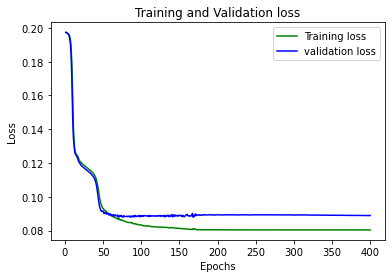

In [230]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* Depend on the random initialization of the model weights, validation loss is calculated and the learning performance over new data set is shown from validation loss to be 8.6%
* the difference in loss between both train and validation reached its saturation with minimal gap. 

 

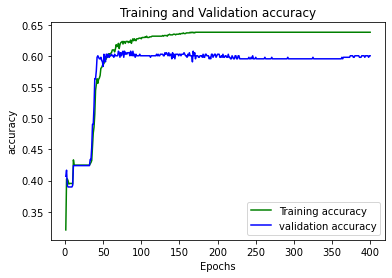

In [231]:
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


* Validation accuracy is achieved to be 61% and remains constant over 50 epoch. No way need to improve epoch number for further improvement as it achieves saturation

#### Using Batch Normalization and Dropout

In [232]:

# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
NN_model_Classifier_1 = Sequential()

# The Input Layer :
NN_model_Classifier_1.add(Dense(128, kernel_initializer='normal',input_dim = X_Train_S.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier_1.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier_1.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier_1.add(LeakyReLU(alpha=0.1))

NN_model_Classifier_1.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier_1.add(LeakyReLU(alpha=0.1))
NN_model_Classifier_1.add(Dropout(0.5))
NN_model_Classifier_1.add(BatchNormalization())

# The Output Layer :
NN_model_Classifier_1.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier_1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
EPOCH=400
Network_Classifier_1=NN_model_Classifier_1.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)


Epoch 1/400
5/5 [==============================] - 7s 221ms/step - loss: 0.1975 - accuracy: 0.1508 - val_loss: 0.1974 - val_accuracy: 0.5466
Epoch 2/400
5/5 [==============================] - 0s 13ms/step - loss: 0.1971 - accuracy: 0.2693 - val_loss: 0.1972 - val_accuracy: 0.5760
Epoch 3/400
5/5 [==============================] - 0s 15ms/step - loss: 0.1964 - accuracy: 0.3801 - val_loss: 0.1969 - val_accuracy: 0.5858
Epoch 4/400
5/5 [==============================] - 0s 14ms/step - loss: 0.1955 - accuracy: 0.4323 - val_loss: 0.1966 - val_accuracy: 0.5858
Epoch 5/400
5/5 [==============================] - 0s 17ms/step - loss: 0.1943 - accuracy: 0.4535 - val_loss: 0.1963 - val_accuracy: 0.5907
Epoch 6/400
5/5 [==============================] - 0s 15ms/step - loss: 0.1929 - accuracy: 0.4992 - val_loss: 0.1959 - val_accuracy: 0.6103
Epoch 7/400
5/5 [==============================] - 0s 16ms/step - loss: 0.1915 - accuracy: 0.5301 - val_loss: 0.1954 - val_accuracy: 0.5686
Epoch 8/400
5/5 [==

5/5 [==============================] - 0s 14ms/step - loss: 0.0864 - accuracy: 0.6477 - val_loss: 0.1073 - val_accuracy: 0.6103
Epoch 60/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0845 - accuracy: 0.6517 - val_loss: 0.1069 - val_accuracy: 0.6127
Epoch 61/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0834 - accuracy: 0.6599 - val_loss: 0.1063 - val_accuracy: 0.6152
Epoch 62/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0819 - accuracy: 0.6643 - val_loss: 0.1043 - val_accuracy: 0.6103
Epoch 63/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0821 - accuracy: 0.6638 - val_loss: 0.1102 - val_accuracy: 0.6201
Epoch 64/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0845 - accuracy: 0.6546 - val_loss: 0.1024 - val_accuracy: 0.6176
Epoch 65/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0769 - accuracy: 0.6824 - val_loss: 0.0983 - val_accuracy: 0.6152
Epoch 66/400
5/5 [========

5/5 [==============================] - 0s 17ms/step - loss: 0.0632 - accuracy: 0.7355 - val_loss: 0.0955 - val_accuracy: 0.5809
Epoch 118/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0657 - accuracy: 0.7260 - val_loss: 0.0873 - val_accuracy: 0.6152
Epoch 119/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0645 - accuracy: 0.7284 - val_loss: 0.0931 - val_accuracy: 0.5980
Epoch 120/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0636 - accuracy: 0.7312 - val_loss: 0.0871 - val_accuracy: 0.6152
Epoch 121/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0613 - accuracy: 0.7430 - val_loss: 0.0895 - val_accuracy: 0.6127
Epoch 122/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0607 - accuracy: 0.7494 - val_loss: 0.0891 - val_accuracy: 0.6176
Epoch 123/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0621 - accuracy: 0.7394 - val_loss: 0.0903 - val_accuracy: 0.6103
Epoch 124/400
5/5 [=

Epoch 175/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0517 - accuracy: 0.7847 - val_loss: 0.0938 - val_accuracy: 0.5882
Epoch 176/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0516 - accuracy: 0.7816 - val_loss: 0.0978 - val_accuracy: 0.5711
Epoch 177/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0502 - accuracy: 0.7901 - val_loss: 0.0964 - val_accuracy: 0.5662
Epoch 178/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0514 - accuracy: 0.7851 - val_loss: 0.0962 - val_accuracy: 0.5809
Epoch 179/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0518 - accuracy: 0.7783 - val_loss: 0.0966 - val_accuracy: 0.5662
Epoch 180/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0486 - accuracy: 0.7961 - val_loss: 0.0976 - val_accuracy: 0.5711
Epoch 181/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0481 - accuracy: 0.7974 - val_loss: 0.0950 - val_accuracy: 0.5809
Epoch 

Epoch 233/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0410 - accuracy: 0.8228 - val_loss: 0.1049 - val_accuracy: 0.5294
Epoch 234/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0450 - accuracy: 0.8032 - val_loss: 0.1011 - val_accuracy: 0.5441
Epoch 235/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0430 - accuracy: 0.8184 - val_loss: 0.1034 - val_accuracy: 0.5319
Epoch 236/400
5/5 [==============================] - 0s 18ms/step - loss: 0.0434 - accuracy: 0.8150 - val_loss: 0.1004 - val_accuracy: 0.5539
Epoch 237/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0417 - accuracy: 0.8240 - val_loss: 0.1009 - val_accuracy: 0.5441
Epoch 238/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0424 - accuracy: 0.8206 - val_loss: 0.1019 - val_accuracy: 0.5417
Epoch 239/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0430 - accuracy: 0.8139 - val_loss: 0.1037 - val_accuracy: 0.5270
Epoch 

Epoch 291/400
5/5 [==============================] - 0s 19ms/step - loss: 0.0410 - accuracy: 0.8231 - val_loss: 0.1044 - val_accuracy: 0.5343
Epoch 292/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0395 - accuracy: 0.8315 - val_loss: 0.1007 - val_accuracy: 0.5466
Epoch 293/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0378 - accuracy: 0.8392 - val_loss: 0.1019 - val_accuracy: 0.5466
Epoch 294/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8384 - val_loss: 0.0995 - val_accuracy: 0.5539
Epoch 295/400
5/5 [==============================] - 0s 18ms/step - loss: 0.0396 - accuracy: 0.8308 - val_loss: 0.1000 - val_accuracy: 0.5539
Epoch 296/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0371 - accuracy: 0.8408 - val_loss: 0.0996 - val_accuracy: 0.5515
Epoch 297/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8423 - val_loss: 0.1017 - val_accuracy: 0.5392
Epoch 

Epoch 349/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0348 - accuracy: 0.8463 - val_loss: 0.1032 - val_accuracy: 0.5368
Epoch 350/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0366 - accuracy: 0.8404 - val_loss: 0.1020 - val_accuracy: 0.5417
Epoch 351/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0347 - accuracy: 0.8491 - val_loss: 0.1024 - val_accuracy: 0.5392
Epoch 352/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0347 - accuracy: 0.8487 - val_loss: 0.1013 - val_accuracy: 0.5466
Epoch 353/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0321 - accuracy: 0.8614 - val_loss: 0.1030 - val_accuracy: 0.5392
Epoch 354/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.8511 - val_loss: 0.1049 - val_accuracy: 0.5245
Epoch 355/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0335 - accuracy: 0.8537 - val_loss: 0.1043 - val_accuracy: 0.5319
Epoch 

With Batchnormalisation, the accuracy rate increased from 70.75% to 79.5%

In [233]:
NN_model_Classifier_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_7 (ModuleWrap (None, 128)               1536      
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 64)                8256      
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 16)                528       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 16)              

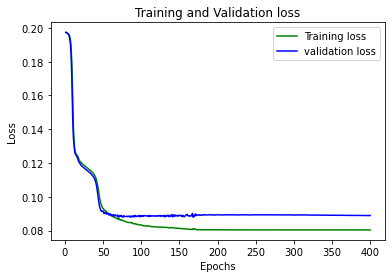

In [234]:
loss_train_1 = Network_Classifier_1.history['loss']
loss_val_1 = Network_Classifier_1.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Validation loss of 9.5% is observed which is higher than before.

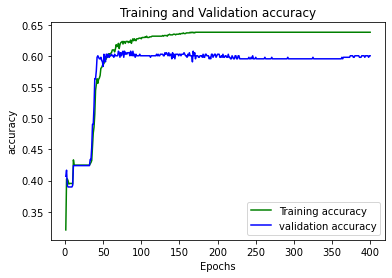

In [235]:
Acc_train_1 = Network_Classifier_1.history['accuracy']
Acc_val_1 = Network_Classifier_1.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Differnce between validation and training loss is observed to have more gap for good fit. validation accuracy is observed to be 57.6%

4. Pickle the model for future use.

In [236]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
loaded_model.summary()

Saved model to disk
Loaded model from disk
accuracy: 60.05%
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_54 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 16)                528       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16)                0         
___________________________________________________________

#### Insights from Model:

* BY using batch normalisation, the accuracy of the model is improved to 79.5%than normal initializer
* Using normal initializer, the accuarcy of the model is achieved to be 70.75% than batch normalisation 
* Though accuracy ois improved, the validation accuracy is decreased in batch normalisation technique using adam optimzer.
* Also, Validation loss too increased in batch normalisation

### PART B: Street View Housing Number Digit Recognition Using Neural Net
* DOMAIN: Autonomous Vehicles
* DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/

* PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset

1. Import the Libraries

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

Load the dataset
Let us now load the dataset that is available as a .h5 file.
Split the data into train and the test dataset

In [266]:
import h5py

# Open the file as read only
h5f = h5py.File("Autonomous_Vehicles_SVHN_single_grey1.h5", 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [268]:
#Let's check the number of images in the training and testing data.
len(X_train),len(X_test),X_train.shape,X_test.shape

(42000, 18000, (42000, 32, 32), (18000, 32, 32))

There are 42,000 images in the training data and 18,000 images in the testing data.

Visualizing images
Use X_train to visualize the first 10 images
Use Y_train to print the first 10 labels

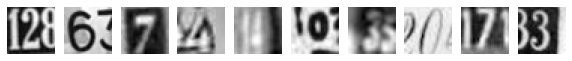

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [240]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

Data preparation

In [241]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [242]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape)
print(y_train.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)
(42000, 1024)
(42000, 10)


Model Building
Now that we have done the data preprocessing, let's build an ANN model.

In [243]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


### Build and train a ANN model

In [244]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1024, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    ]) 
    #declare adam optimizer with learning rate of 0.0001 
    adam = optimizers.Adam(learning_rate=0.0001)
    
    #compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])
    return model

In [245]:
# Build the model
model_1 = nn_model_1()
#Print the summary
model_1.summary()
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=128, verbose = 1)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 64)                65600     
_________________________________________________________________
dense_75 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_76 (Dense)             (None, 10)                330       
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
263/263 [==============================] - 3s 7ms/step - loss: 2.2993 - accuracy: 0.1179 - val_loss: 2.2594 - val_accuracy: 0.1463
Epoch 2/50
263/263 [==============================] - 1s 5ms/step - loss: 2.1130 - accuracy: 0.2276 - val_loss: 1.9376 - val_accuracy: 0.3279
Epoch 3/50
263/263 [==============================] - 1s 5ms/step - loss: 1.7953 - accuracy: 0.

In [246]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model_1.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model_1.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
141/141 [==============================] - 1s 3ms/step - loss: 1.0763 - accuracy: 0.6694
test loss, test acc: [1.0762532949447632, 0.6693888902664185]
Generate predictions for 3 samples
predictions shape: (3, 10)


### PLotting Losses Vs Epochs


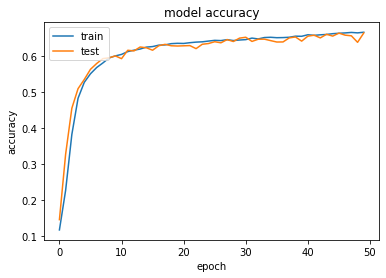

In [247]:
# summarize history for accuracy
plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

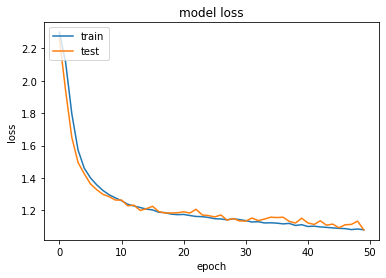

In [248]:
# summarize history for loss
plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [249]:
#Define the function
def nn_model_2():
    model = tf.keras.Sequential([
       Dense(64, activation='relu', input_shape=(1024, )),
       BatchNormalization(),
       Dense(32, activation='relu'),
       BatchNormalization(),
       Dense(10, activation = 'softmax')
    ]) 
    #declare adam optimizer with learning rate of 0.0001 
    adam = optimizers.Adam(learning_rate=0.0001)
    
    #compile the model
    model.compile(optimizer= adam, loss='categorical_crossentropy',  metrics = ['accuracy'])
    return model

In [250]:
# Build the model
model_2 = nn_model_2()
#Print the summary
model_2.summary()
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=128, verbose = 1)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 64)                65600     
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dense_78 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_21 (Batc (None, 32)                128       
_________________________________________________________________
dense_79 (Dense)             (None, 10)                330       
Total params: 68,394
Trainable params: 68,202
Non-trainable params: 192
_________________________________________________________________
Epoch 1/50
263/263 [==============================] - 4s 8ms/step - loss: 2.4239 - accuracy: 0.1569 - val_loss: 2

In [251]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results_1 = model_2.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results_1)

Evaluate on test data
141/141 [==============================] - 1s 4ms/step - loss: 0.8751 - accuracy: 0.7356
test loss, test acc: [0.8751014471054077, 0.7356111407279968]


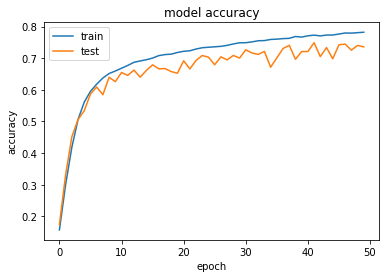

In [252]:
# summarize history for accuracy
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

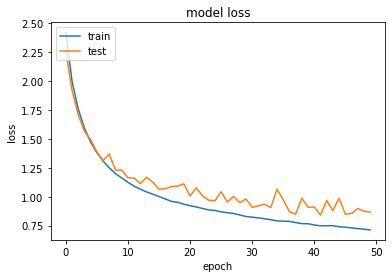

In [253]:
# summarize history for loss
plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [254]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN_adam'], 'accuracy': [results[1]]},index={'1'})
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN_adam,0.669389
2,NN_Batch_adam,0.735611


In [255]:
#Define the function
def nn_model_3():
    model = tf.keras.Sequential([
       Dense(128, activation='relu', input_shape=(1024, )),
       BatchNormalization(),
       Dense(64, activation='relu'),
       BatchNormalization(),
       Dense(64, activation='relu'),
       BatchNormalization(),
       Dense(32, activation='relu'),
       BatchNormalization(),
       Dense(10, activation = 'softmax')
    ]) 
    #declare adam optimizer with learning rate of 0.0001 
    #adam = optimizers.Adam(learning_rate=0.0001)
    
    #compile the model
    model.compile(optimizer='SGD', loss='categorical_crossentropy',  metrics = ['accuracy'])
    return model

In [256]:
# Build the model
model_3 = nn_model_3()
#Print the summary
model_3.summary()
# Fit the model
history_model_3 = model_3.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=128, verbose = 1)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 128)               131200    
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dense_81 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_23 (Batc (None, 64)                256       
_________________________________________________________________
dense_82 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_24 (Batc (None, 64)                256       
_________________________________________________________________
dense_83 (Dense)             (None, 32)              

263/263 [==============================] - 1s 5ms/step - loss: 0.4886 - accuracy: 0.8476 - val_loss: 0.9423 - val_accuracy: 0.7162
Epoch 48/50
263/263 [==============================] - 1s 5ms/step - loss: 0.4830 - accuracy: 0.8485 - val_loss: 0.9748 - val_accuracy: 0.7088
Epoch 49/50
263/263 [==============================] - 1s 5ms/step - loss: 0.4804 - accuracy: 0.8477 - val_loss: 0.7802 - val_accuracy: 0.7714
Epoch 50/50
263/263 [==============================] - 1s 5ms/step - loss: 0.4792 - accuracy: 0.8493 - val_loss: 0.8264 - val_accuracy: 0.7529


In [257]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results_2 = model_3.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results_2)

Evaluate on test data
141/141 [==============================] - 0s 3ms/step - loss: 0.8268 - accuracy: 0.7535
test loss, test acc: [0.8267986178398132, 0.7534999847412109]


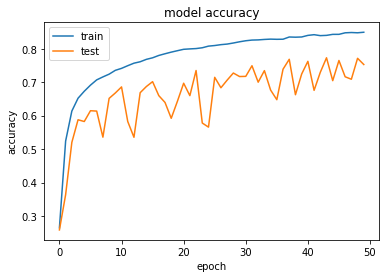

In [258]:
# summarize history for accuracy
plt.plot(history_model_3.history['accuracy'])
plt.plot(history_model_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

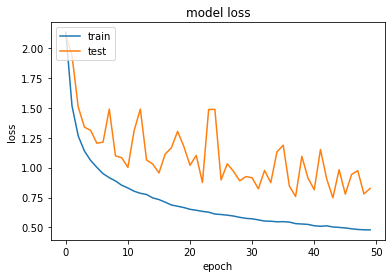

In [259]:
# summarize history for loss
plt.plot(history_model_3.history['loss'])
plt.plot(history_model_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [260]:
#Store the accuracy results for each model in a dataframe for final comparison
sgdResults = pd.DataFrame({'Method':['NN_Batch_SGD'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, sgdResults])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN_adam,0.669389
2,NN_Batch_adam,0.735611
3,NN_Batch_SGD,0.753500


On comparing the above models, MOdel using Optimizer "ADAM" batch normalistion performed well when compared to other models

**Predicting the digits using NN_batch_ADAM classifier on test data Image 1

9


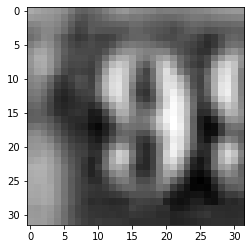

In [261]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')
#Predicting the digits
y_pred_1=np.argmax(model_2.predict(X_test)[5], axis=-1)
print(y_pred_1)

### The digit "9" was predicted


*Image 2

8


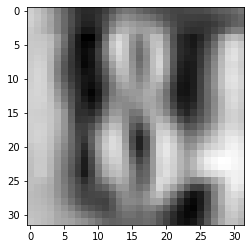

In [262]:
#Showing the image
plt.imshow(X_test[98].reshape(32,32),cmap='gray')
#Predicting the digits
y_pred_2=np.argmax(model_2.predict(X_test)[98], axis=-1)
print(y_pred_2)

Digit "8" was predicted succesfully

Image 3

9


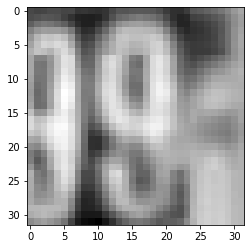

In [263]:
#Showing the image
plt.imshow(X_test[112].reshape(32,32),cmap='gray')
#Predicting the digits
y_pred_3 = np.argmax(model_2.predict(X_test)[112], axis=-1)
print(y_pred_3)

In [264]:

#Predicting for all images
y_pred=np.argmax(model_2.predict(X_test), axis=-1)
#y_pred=keras_model_final.predict_classes(X_test)
print(y_pred)

[0 7 2 ... 7 9 2]


* Neural network with Adam Optimizer has accuracy and loss between train and test dataset achieved good fit with an accuracy of 66%
* Neural network with Batch normalisation and Adam Optimizer, accuracy of 73.5% is achieved but found slight differnce in loss and accuracy between train and test dataset 
* Neural network with Batch normalisation and SGD Optimizer, accuracy of 75% is achieved but the model accuracy and loss showings overfitting of data

